In [1]:
import shutil
import pandas as pd
import numpy as np
import os
# torch.manual_seed(1234)
from evaluate_metrics import compute_eer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Pooled EER 구하기

In [ ]:
eval_files = [
    "/home/woongjae/wildspoof/protocols/protocol_asv19_noise.txt",
    "/home/woongjae/wildspoof/protocols/protocol_deepen.txt",
    "/home/woongjae/wildspoof/protocols/protocol_df21_noise.txt",
    "/home/woongjae/wildspoof/protocols/protocol_itw.txt",
    "/home/woongjae/wildspoof/protocols/protocol_wildspoof.txt"
]

pred_files = [
    "/home/woongjae/wildspoof/SFM-ADD/results/baseline/eval_asv19_noise.txt",
    "/home/woongjae/wildspoof/SFM-ADD/results/baseline/eval_deepen.txt",
    "/home/woongjae/wildspoof/SFM-ADD/results/baseline/eval_df21_noise.txt",
    "/home/woongjae/wildspoof/SFM-ADD/results/baseline/eval_itw.txt",
    "/home/woongjae/wildspoof/SFM-ADD/results/baseline/eval_wildspoof.txt"
]

eval_dfs, pred_dfs = [], []

for e_file, p_file in zip(eval_files, pred_files):
    eval_df = pd.read_csv(e_file, sep=" ", header=None, names=["utt","subset", "label"])
    pred_df = pd.read_csv(p_file, sep=" ", header=None, names=["utt", "spoof", "bonafide"])
    merged = pd.merge(eval_df, pred_df, on="utt")
    eval_dfs.append(merged)

# 전체 데이터 통합
pooled_df = pd.concat(eval_dfs, ignore_index=True)
print(pooled_df['label'].unique())

spoof_scores = pooled_df[pooled_df['label'] == 'spoof']['bonafide']
bonafide_scores = pooled_df[pooled_df['label'] == 'bonafide']['bonafide']

eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("✅ Pooled EER: {:.4f}%, threshold: {:.4f}".format(eer * 100, threshold))
print("Total samples:", len(pooled_df))

['spoof' 'bonafide']
✅ Pooled EER: 17.3912%, threshold: 1.8324
Total samples: 1483881


### SSL-AAISST

In [3]:
eval_df = pd.read_csv("/home/woongjae/IITP_project/final_tta/protocol_df21.txt",sep=" ", header=None)
eval_df.columns = ["utt", 'label']
pred_df = pd.read_csv("/home/woongjae/IITP_project/final_tta/df21-score.txt", sep=" ", header=None)
pred_df.columns = ["utt", "spoof", "bonafide"]

res_df = pd.merge(eval_df, pred_df, on='utt')

spoof_scores = res_df[res_df['label'] == 'spoof']['bonafide']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['bonafide']

eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))

EER: 2.6308%, threshold: -1.1970


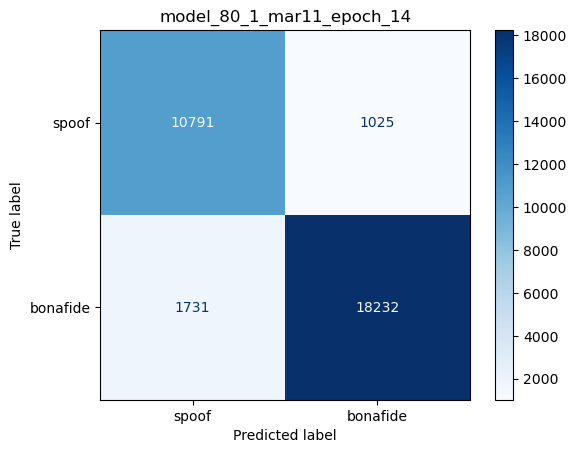

In [18]:
res_df['pred'] = res_df['bonafide'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# print(res_df.head)

# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Blues', values_format='g')
plt.title("model_80_1_mar11_epoch_14")
plt.show()


### ConformerTCM

In [41]:
eval_df = pd.read_csv("/home/woongjae/noise-tracing/multi-feature_fusion/ICASSP2026/protocols/catastropy/g0.txt",sep=" ", header=None)
eval_df.columns = ["utt", 'subset','label']

pred_df = pd.read_csv("/home/woongjae/noise-tracing/multi-feature_fusion/ICASSP2026/results/FT-cata/conformertcm-g3-g0.txt", sep=" ", header=None)
pred_df.columns = ["utt", "bonafide"]
res_df = pd.merge(eval_df, pred_df, on='utt')
res_df.head()
spoof_scores = res_df[res_df['label'] == 'spoof']['bonafide']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['bonafide']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))

EER: 0.3252%, threshold: 2.1725


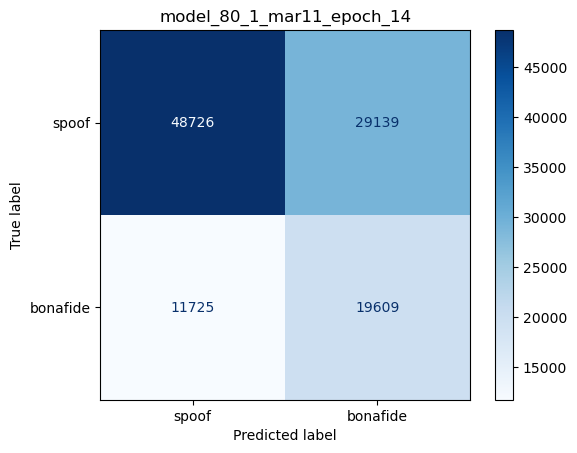

In [29]:
res_df['pred'] = res_df['bonafide'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# print(res_df.head)

# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Blues', values_format='g')
plt.title("model_80_1_mar11_epoch_14")
plt.show()
